# Integrative analysis of ATAC & RNA - Unsupervised analysis
- goal: sanity checks and unsupervised analysis
- input: raw counts, normalized, batch corrected and fitted data
- output: correlation between samples, PCA, UMAP

In [1]:
cd ../

/home/sreichl/projects/bmdm-stim


In [2]:
# libraries
import pandas as pd
import os

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import seaborn as sns

In [5]:
# import util functions
import sys
sys.path.insert(1, os.path.join('src'))

import utils_dimred_UMAP_PCA

In [4]:
# configs
dir_data = os.path.join('results','INT')
dir_results=os.path.join('results','INT','unsupervised_analysis')


In [5]:
if not os.path.exists(dir_results):
        os.mkdir(dir_results)

# load data

In [6]:
# Load sample annotation
annot = pd.read_csv(os.path.join(dir_data, 'INT_annotations.csv'), index_col=0, header=0,)
print(annot.shape)
annot.head()

(142, 5)


,library,treatment,time,experiment,group
RNA_PT76_R1_C_albicans_2h,Quant-seq,C_albicans,2h,PT76,C_albicans_2h
RNA_PT82_R1_C_albicans_24h,Quant-seq,C_albicans,24h,PT82,C_albicans_24h
RNA_PT76_R1_C_albicans_4h,Quant-seq,C_albicans,4h,PT76,C_albicans_4h
RNA_PT76_R1_C_albicans_6h,Quant-seq,C_albicans,6h,PT76,C_albicans_6h
RNA_PT82_R1_C_albicans_8h,Quant-seq,C_albicans,8h,PT82,C_albicans_8h


In [7]:
# Load raw data
data_raw = pd.read_csv(os.path.join(dir_data, 'INT_counts.csv'), index_col=0, header=0,)
print(data_raw.shape)
data_raw.head()

(45069, 142)


,RNA_PT76_R1_C_albicans_2h,RNA_PT82_R1_C_albicans_24h,RNA_PT76_R1_C_albicans_4h,RNA_PT76_R1_C_albicans_6h,RNA_PT82_R1_C_albicans_8h,RNA_PT76_R1_untreated_0h,RNA_PT82_R1_untreated_24h,RNA_PT76_R1_IFN_beta_2h,RNA_PT82_R1_IFN_beta_24h,RNA_PT76_R1_IFN_beta_4h,...,PT82_R2_IFN_gamma_24h,PT82_R2_IFN_gamma_8h,PT82_R2_LCMV_Cl13_24h,PT82_R2_LCMV_Cl13_8h,PT82_R2_LO28_24h,PT82_R2_LO28_8h,PT82_R2_LPS_24h,PT82_R2_LPS_8h,PT82_R2_untreated_24h,PT82_R2_untreated_8h
ENSMUSG00000098104,1,6,0,2,1,9,4,6,4,0,...,8,7,3,11,31,14,5,12,10,9
ENSMUSG00000033845,219,220,201,169,196,204,226,202,124,153,...,210,109,218,185,32,164,127,155,156,123
ENSMUSG00000025903,115,105,106,113,87,144,128,159,98,137,...,366,204,351,328,65,192,282,150,255,205
ENSMUSG00000033813,63,57,39,74,51,53,68,58,63,124,...,701,414,674,625,113,424,459,357,550,485
ENSMUSG00000033793,315,222,309,250,312,203,277,266,222,218,...,0,5,6,4,12,6,3,5,4,9


In [8]:
# Load normalized data
data_norm = pd.read_csv(os.path.join(dir_data, 'INT_norm.csv'), index_col=0, header=0,)
print(data_norm.shape)
data_norm.head()

(45069, 142)


,RNA_PT76_R1_C_albicans_2h,RNA_PT82_R1_C_albicans_24h,RNA_PT76_R1_C_albicans_4h,RNA_PT76_R1_C_albicans_6h,RNA_PT82_R1_C_albicans_8h,RNA_PT76_R1_untreated_0h,RNA_PT82_R1_untreated_24h,RNA_PT76_R1_IFN_beta_2h,RNA_PT82_R1_IFN_beta_24h,RNA_PT76_R1_IFN_beta_4h,...,PT82_R2_IFN_gamma_24h,PT82_R2_IFN_gamma_8h,PT82_R2_LCMV_Cl13_24h,PT82_R2_LCMV_Cl13_8h,PT82_R2_LO28_24h,PT82_R2_LO28_8h,PT82_R2_LPS_24h,PT82_R2_LPS_8h,PT82_R2_untreated_24h,PT82_R2_untreated_8h
ENSMUSG00000098104,1.405811,2.827185,-0.734410,2.015832,1.521031,3.228688,2.443284,2.954642,2.672776,-0.736557,...,-0.689852,-1.351086,-1.207880,-0.545239,1.332881,-0.552659,-1.183220,-0.699713,-0.696228,-1.089052
ENSMUSG00000033845,6.087384,6.123522,6.259480,5.883915,6.154641,6.080316,6.096749,6.199833,5.787196,5.995907,...,2.938267,2.547950,3.147234,2.812987,1.495079,3.336820,2.507135,3.585831,2.746262,2.614992
ENSMUSG00000025903,5.435192,5.343274,5.586660,5.477830,5.306164,5.720310,5.474042,5.958396,5.553141,5.895476,...,4.454032,4.229109,4.484900,4.482084,4.562424,3.814140,4.631544,3.491669,4.179978,4.060240
ENSMUSG00000033813,4.858575,4.733815,4.624963,5.058409,4.792464,4.719336,4.838214,4.948055,5.124871,5.798483,...,6.055141,6.044589,6.115250,6.174928,6.027826,5.906553,5.818789,5.896174,6.248030,6.253013
ENSMUSG00000033793,6.449895,6.132281,6.704468,6.296670,6.653410,6.073398,6.311933,6.476513,6.349170,6.323613,...,-2.559897,-1.744813,-0.795451,-1.249856,-1.101236,-1.361392,-1.610179,-1.572410,-1.394374,-1.089052


In [9]:
# Load batch corrected data
data_batch = pd.read_csv(os.path.join(dir_data, 'INT_norm_batchCorrected.csv'), index_col=0, header=0,)
print(data_batch.shape)
data_batch.head()

(45069, 142)


,RNA_PT76_R1_C_albicans_2h,RNA_PT82_R1_C_albicans_24h,RNA_PT76_R1_C_albicans_4h,RNA_PT76_R1_C_albicans_6h,RNA_PT82_R1_C_albicans_8h,RNA_PT76_R1_untreated_0h,RNA_PT82_R1_untreated_24h,RNA_PT76_R1_IFN_beta_2h,RNA_PT82_R1_IFN_beta_24h,RNA_PT76_R1_IFN_beta_4h,...,PT82_R2_IFN_gamma_24h,PT82_R2_IFN_gamma_8h,PT82_R2_LCMV_Cl13_24h,PT82_R2_LCMV_Cl13_8h,PT82_R2_LO28_24h,PT82_R2_LO28_8h,PT82_R2_LPS_24h,PT82_R2_LPS_8h,PT82_R2_untreated_24h,PT82_R2_untreated_8h
ENSMUSG00000098104,1.405811,2.827185,-0.734410,2.015832,1.521031,3.228688,2.443284,2.954642,2.672776,-0.736557,...,2.264365,1.603131,1.746338,2.408978,4.287098,2.401559,1.770998,2.254504,2.257990,1.865165
ENSMUSG00000033845,6.087384,6.123522,6.259480,5.883915,6.154641,6.080316,6.096749,6.199833,5.787196,5.995907,...,5.844907,5.454590,6.053874,5.719627,4.401719,6.243460,5.413775,6.492471,5.652902,5.521632
ENSMUSG00000025903,5.435192,5.343274,5.586660,5.477830,5.306164,5.720310,5.474042,5.958396,5.553141,5.895476,...,6.012205,5.787282,6.043073,6.040258,6.120597,5.372314,6.189717,5.049843,5.738152,5.618413
ENSMUSG00000033813,4.858575,4.733815,4.624963,5.058409,4.792464,4.719336,4.838214,4.948055,5.124871,5.798483,...,4.993532,4.982980,5.053641,5.113319,4.966217,4.844944,4.757180,4.834565,5.186421,5.191404
ENSMUSG00000033793,6.449895,6.132281,6.704468,6.296670,6.653410,6.073398,6.311933,6.476513,6.349170,6.323613,...,5.011635,5.826719,6.776081,6.321676,6.470296,6.210140,5.961353,5.999122,6.177158,6.482480


In [10]:
# load DEA results
dea_results = pd.read_csv(os.path.join(dir_data, 'DEA','INT_DEA_all.csv'), index_col=0, header=0,)
print(dea_results.shape)
dea_results.head()

(1397139, 9)


,logFC,AveExpr,t,P.Value,adj.P.Val,B,time,treatment,group
rn,,,,,,,,,
ENSMUSG00000074141,3.248002,3.743529,8.102705,3.703750e-12,8.346216e-08,16.707399,24h,C_albicans,C_albicans_24h
ENSMUSG00000108227,3.200747,2.445842,8.204313,2.315435e-12,8.346216e-08,16.540949,24h,C_albicans,C_albicans_24h
ENSMUSG00000039699,2.042018,5.973286,7.750445,1.878408e-11,2.821932e-07,15.488355,24h,C_albicans,C_albicans_24h
ENSMUSG00000032883,-1.310611,5.362410,-7.620933,3.404211e-11,3.835610e-07,15.182627,24h,C_albicans,C_albicans_24h
ENSMUSG00000079184,-0.853646,6.978168,-7.369471,1.075002e-10,8.074875e-07,14.112045,24h,C_albicans,C_albicans_24h


# Unsupervised Analyses

In [11]:
data_all = {'raw':data_raw, 
            'norm':data_norm, 
            'batch':data_batch}

## Sample correlation

/nobackup/lab_bock/users/sreichl/miniconda3/envs/basics/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


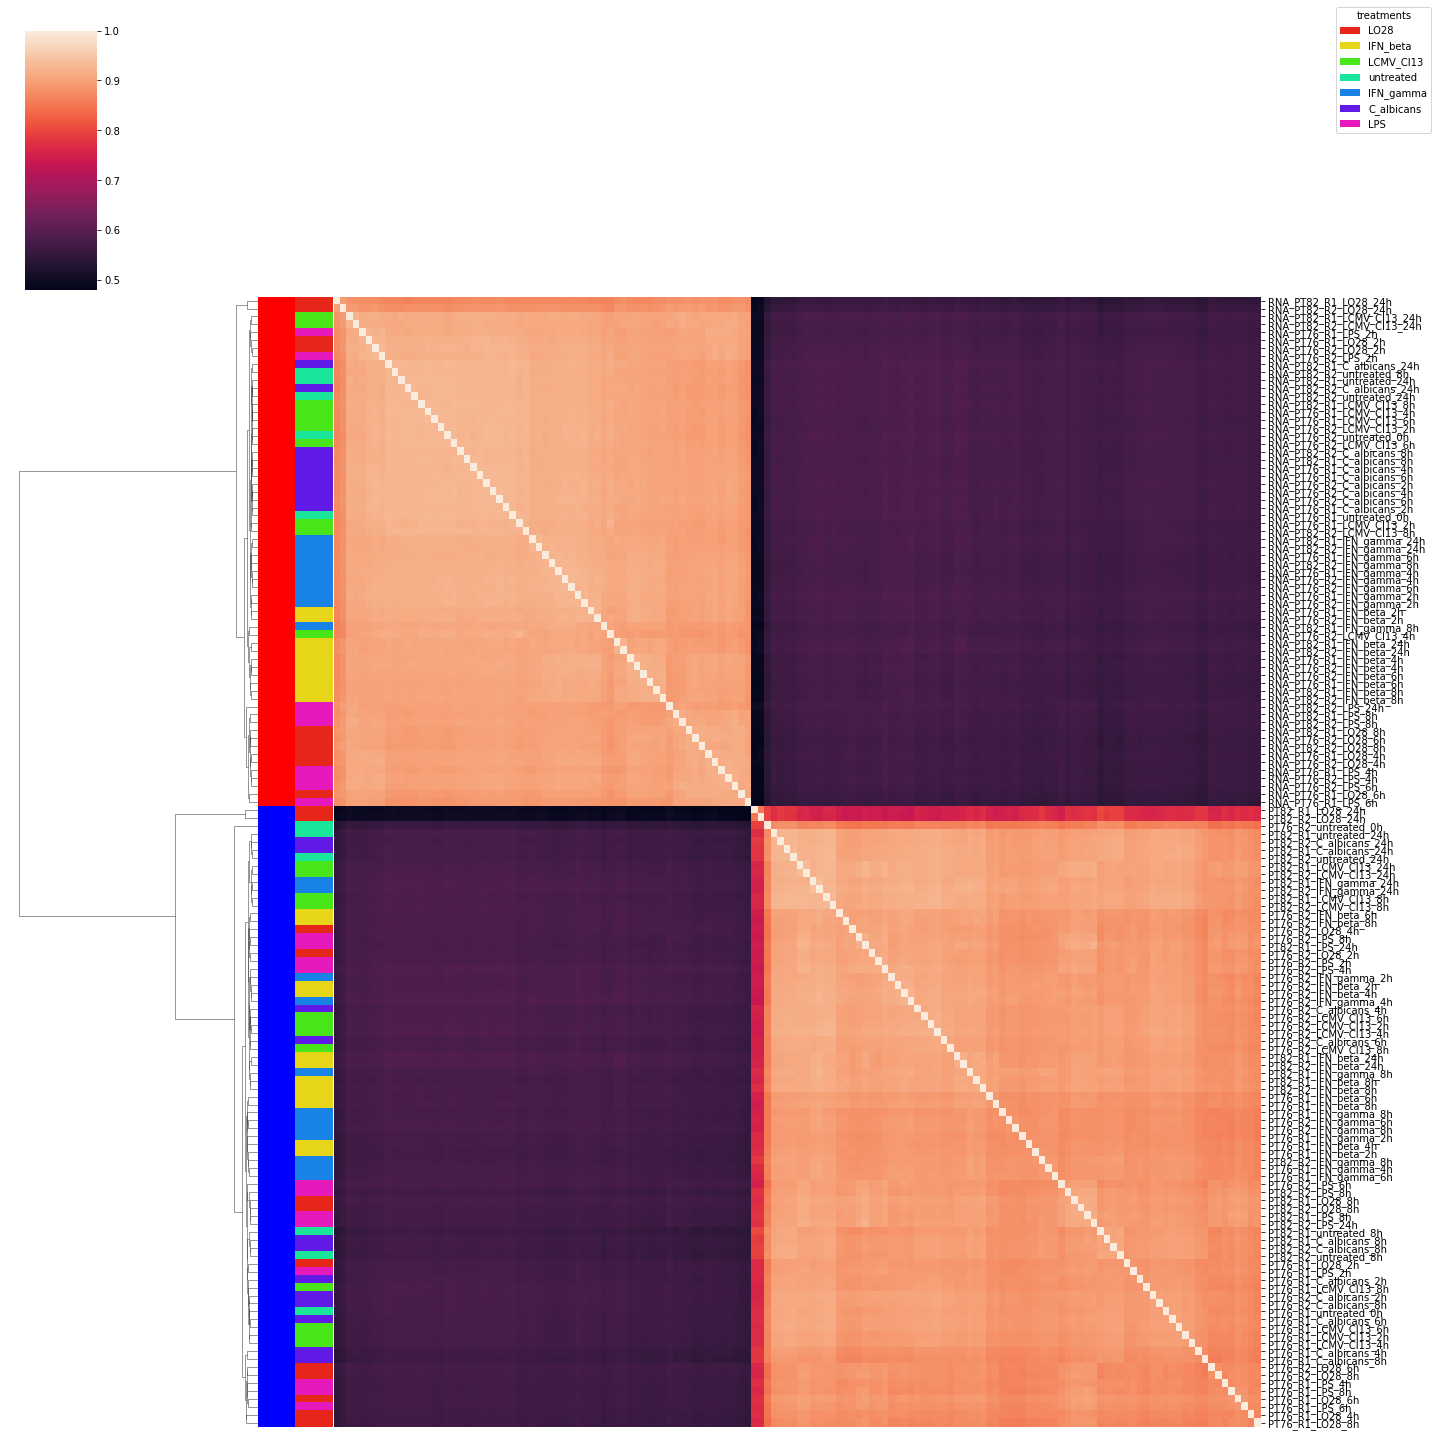

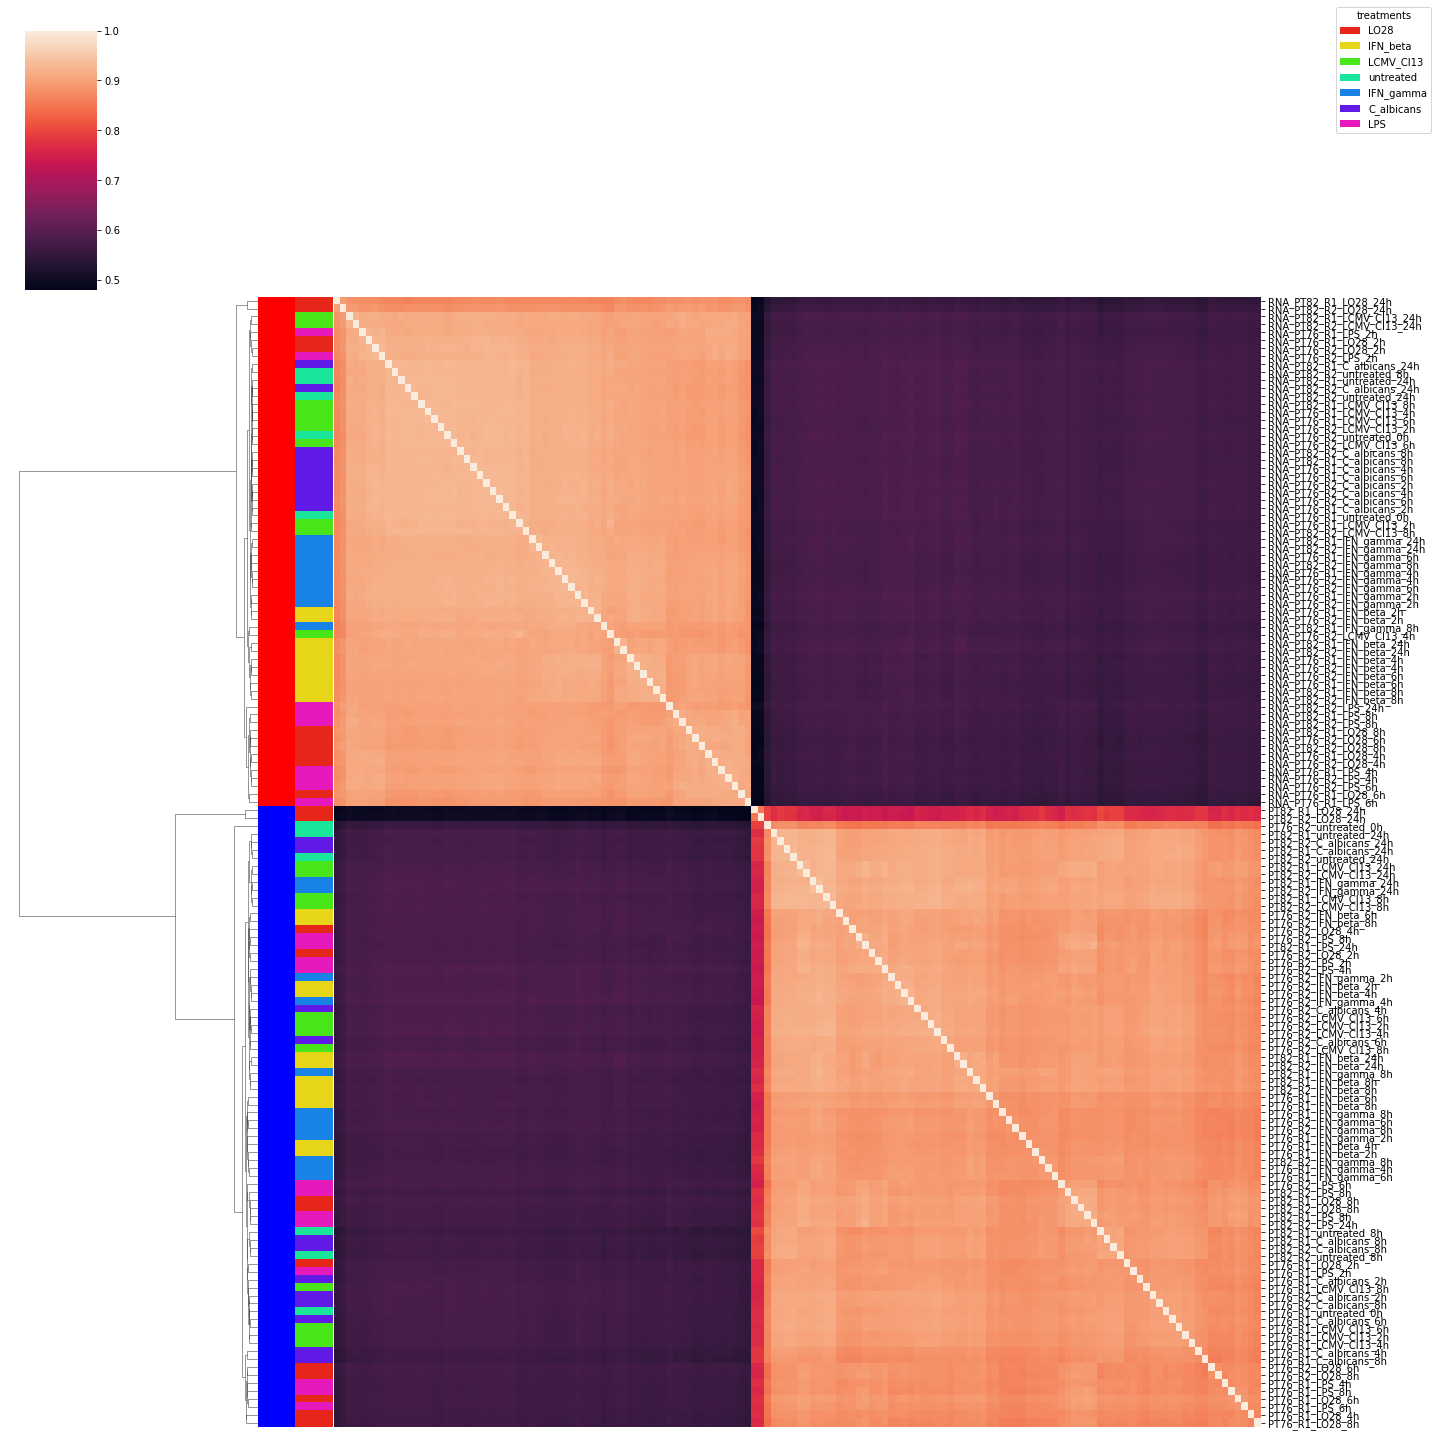

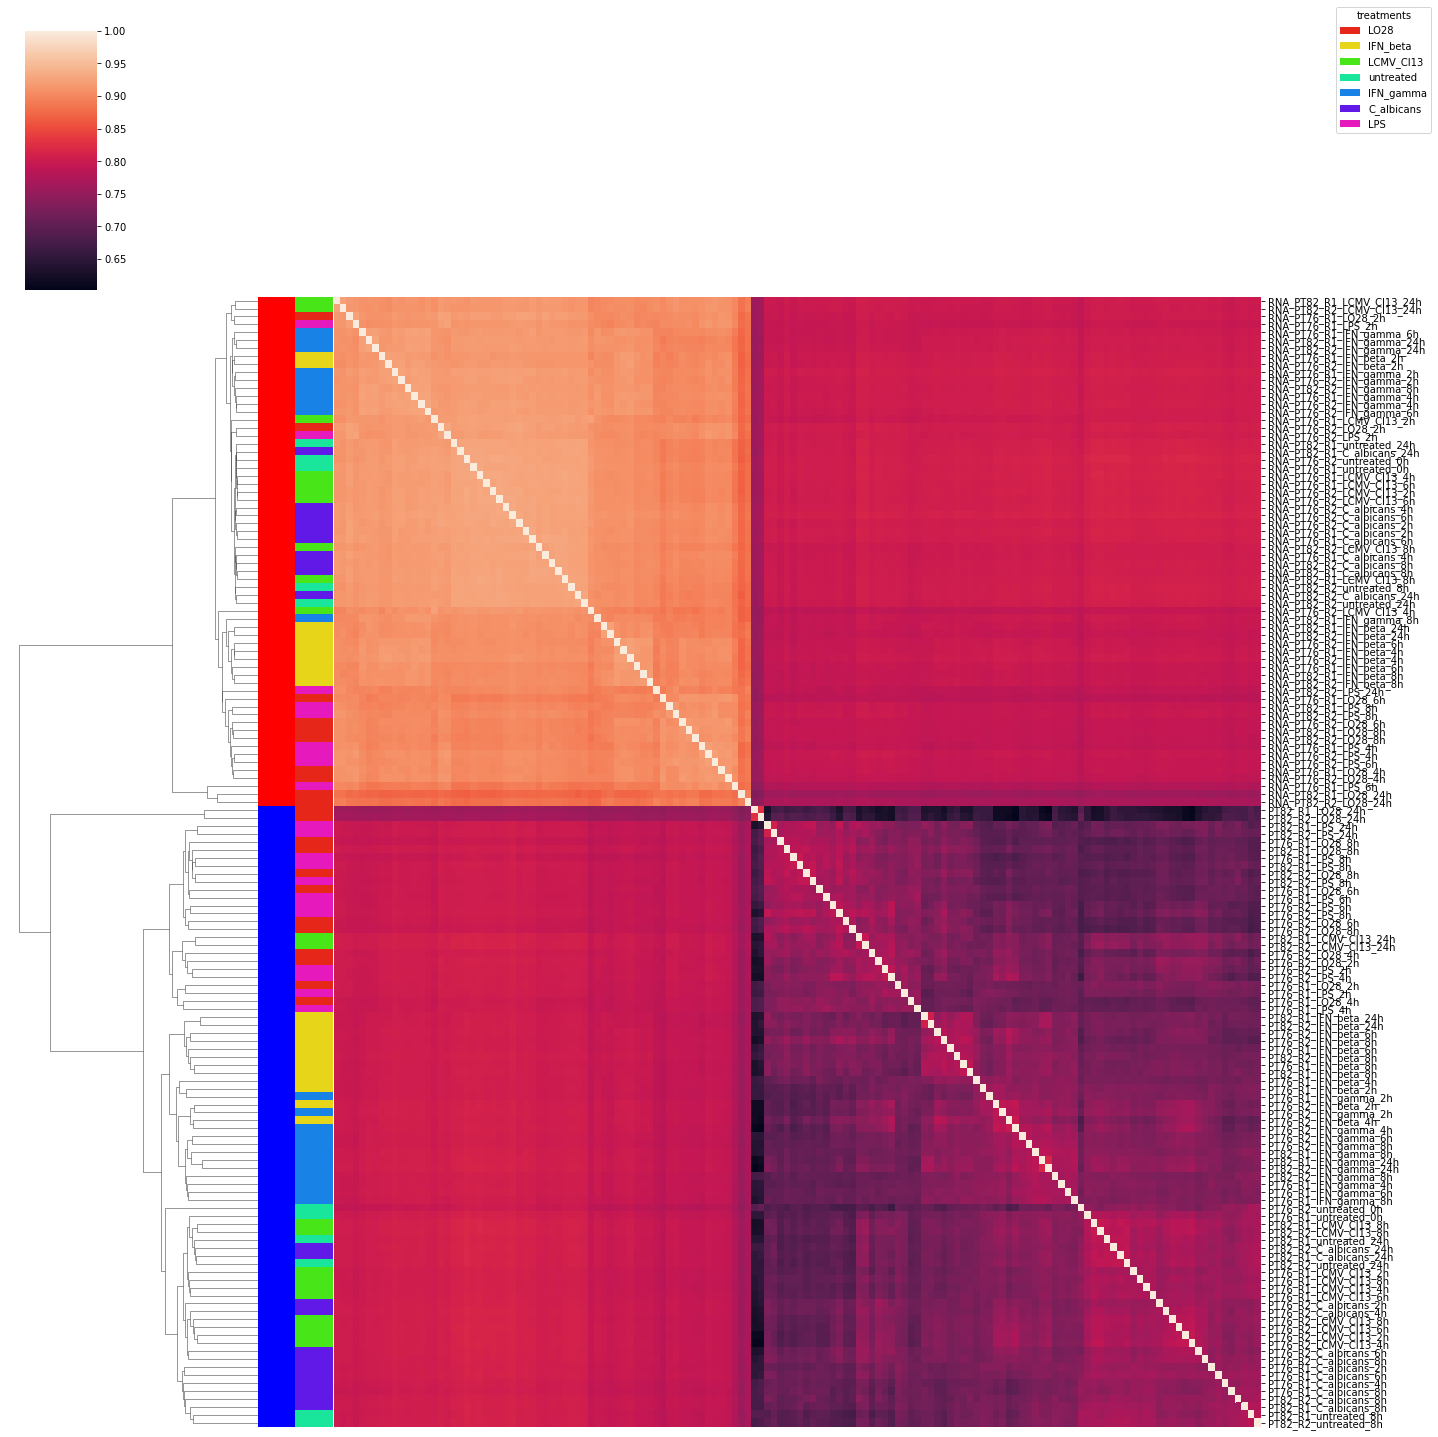

In [12]:
# sample correlations
for step in data_all.keys():
    # make color legends
    lut_lib = dict(zip(annot['library'].unique(), "rbg"))
    row_colors_lib = annot['library'].map(lut_lib)

    lut_treatment = dict(zip(set(annot['treatment']), sns.hls_palette(len(set(annot['treatment'])), l=0.5, s=0.8)))
    row_colors_treatment = annot['treatment'].map(lut_treatment)

    # make clustermap
    cg = sns.clustermap(data_all[step].corr(method='spearman'),
                  row_colors=[row_colors_lib, row_colors_treatment],
                  yticklabels=True,
                  xticklabels=False,
                       figsize=(20, 20))
    cg.ax_col_dendrogram.set_visible(False)
    # add legends
    handles = [Patch(facecolor=lut_treatment[name]) for name in lut_treatment]
    plt.legend(handles, lut_treatment, title='treatments',
               bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')

    # save figure
    fig = cg.fig
    fig.savefig(fname=os.path.join(dir_results, "sampleCorrelation_{}.svg".format(step)),
            format="svg",
            dpi=300,
            bbox_inches="tight",
               )

## PCA & UMAP

discrete variable  treatment


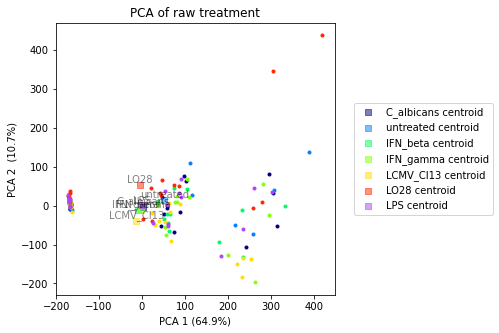

discrete variable  time


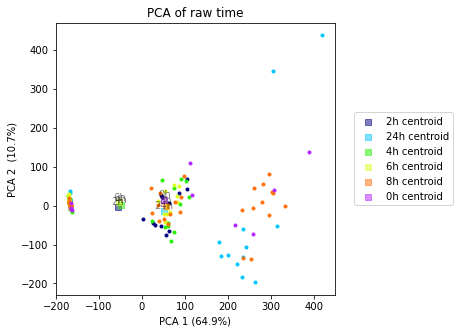

discrete variable  library


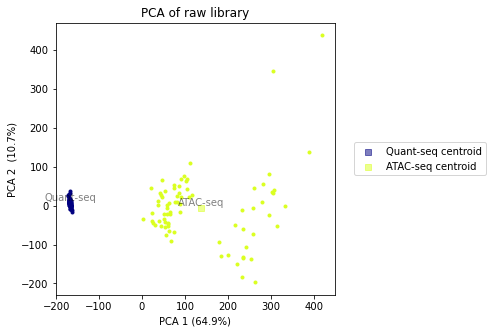

discrete variable  experiment


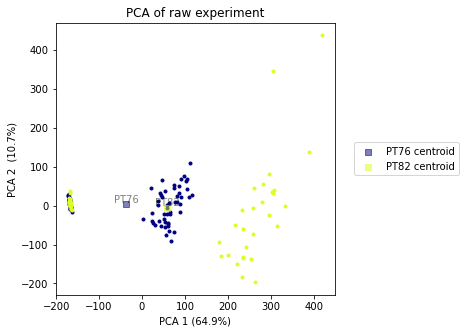

discrete variable  group


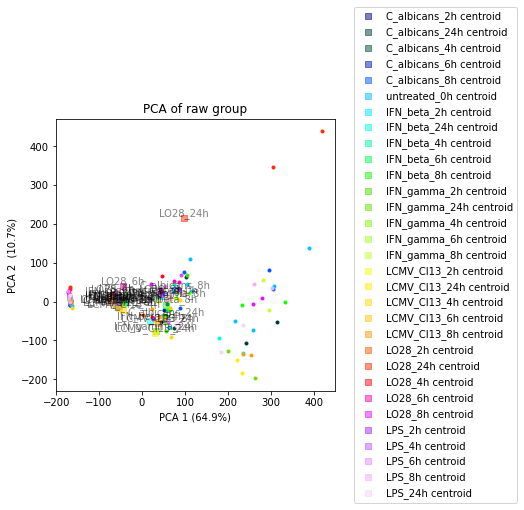

discrete variable  treatment


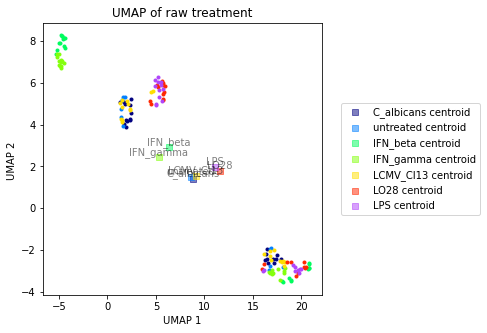

discrete variable  time


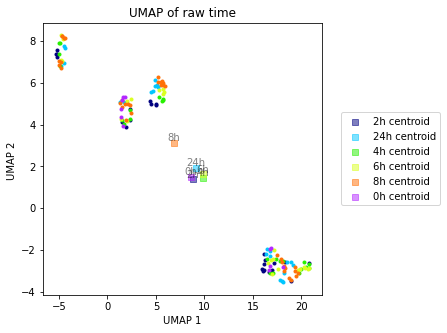

discrete variable  library


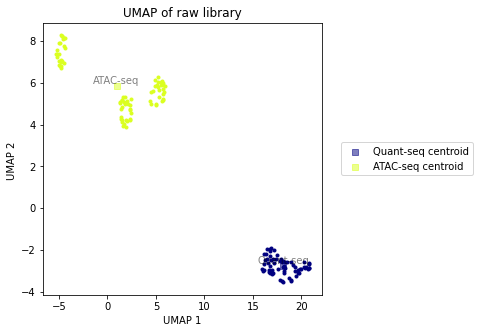

discrete variable  experiment


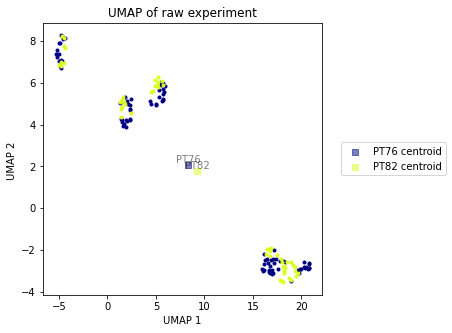

discrete variable  group


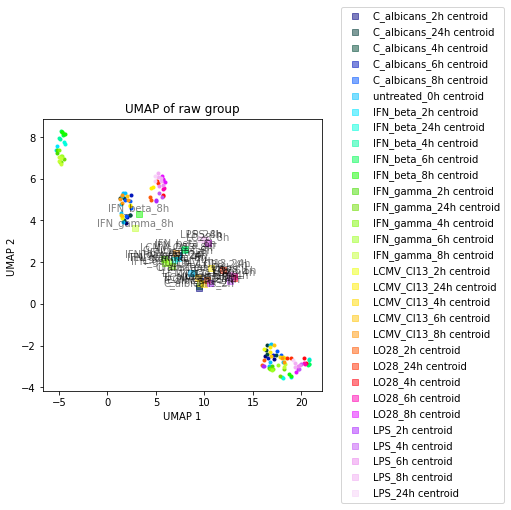

discrete variable  treatment


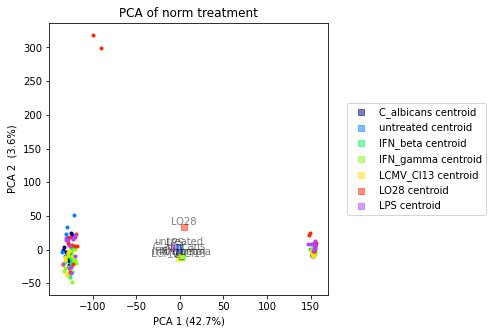

discrete variable  time


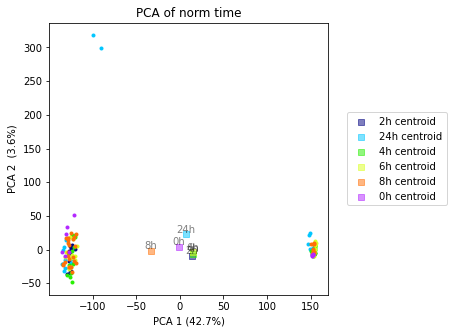

discrete variable  library


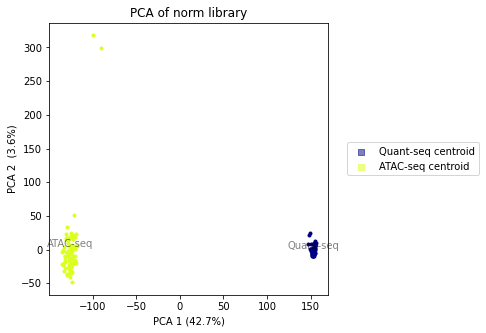

discrete variable  experiment


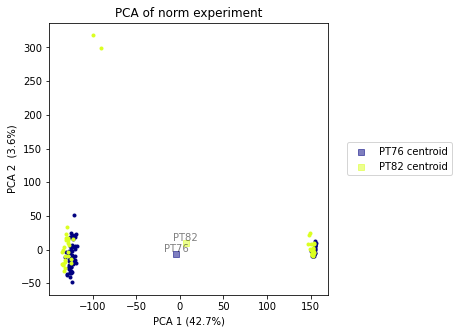

discrete variable  group


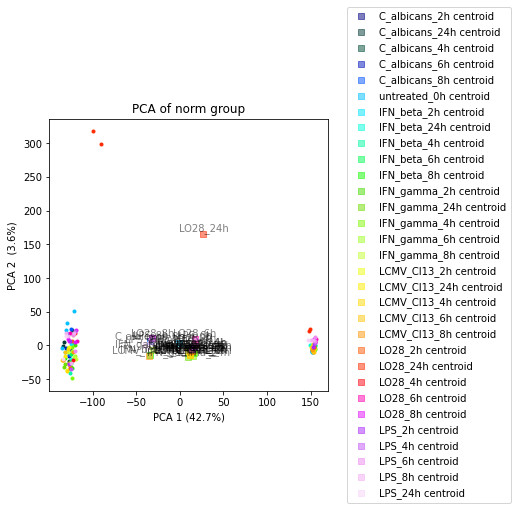

discrete variable  treatment


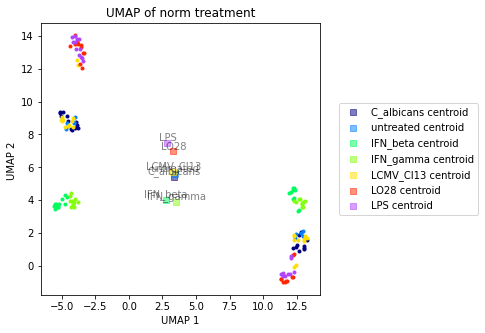

discrete variable  time


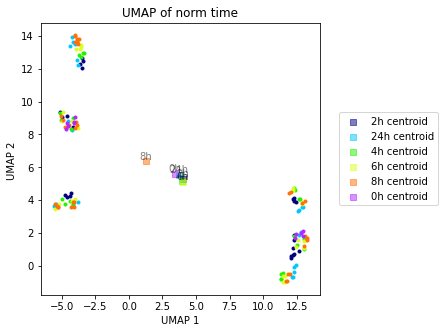

discrete variable  library


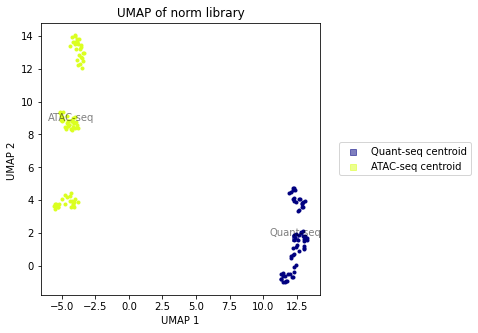

discrete variable  experiment


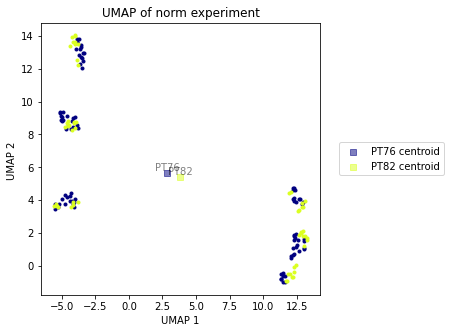

discrete variable  group


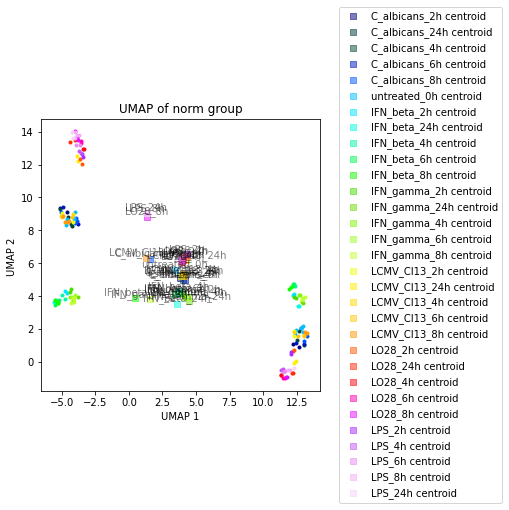

discrete variable  treatment


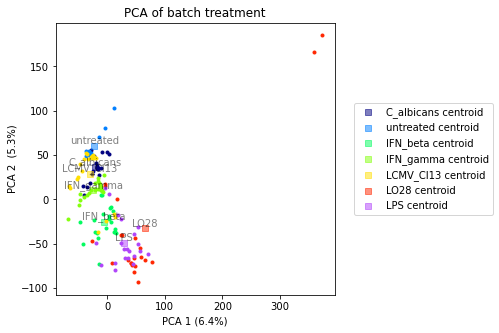

discrete variable  time


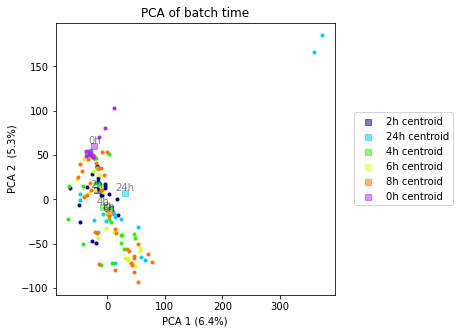

discrete variable  library


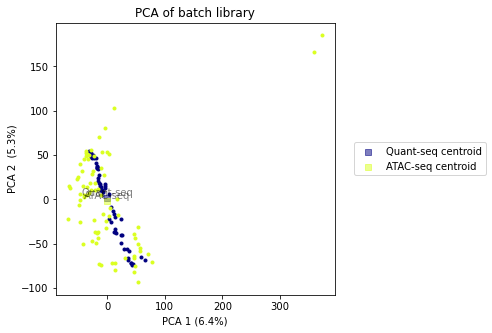

discrete variable  experiment


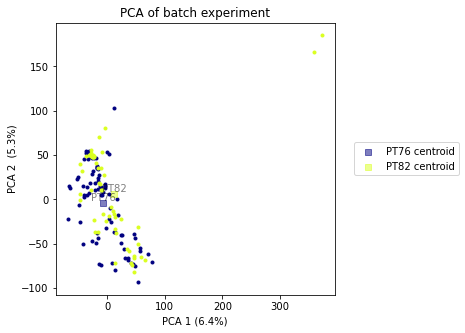

discrete variable  group


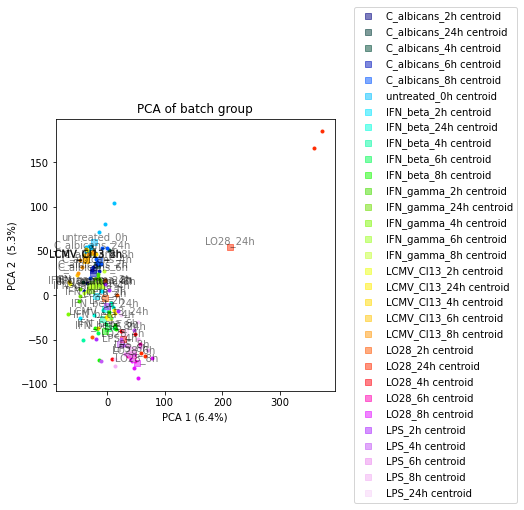

discrete variable  treatment


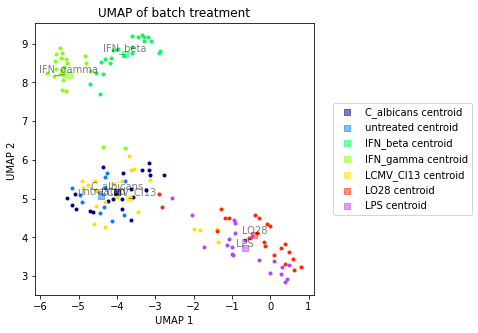

discrete variable  time


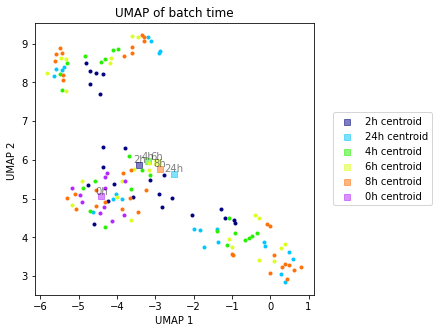

discrete variable  library


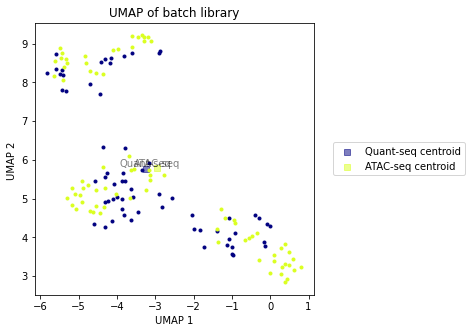

discrete variable  experiment


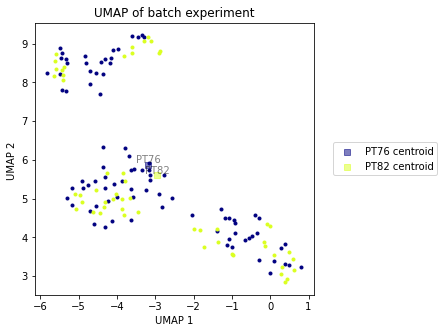

discrete variable  group


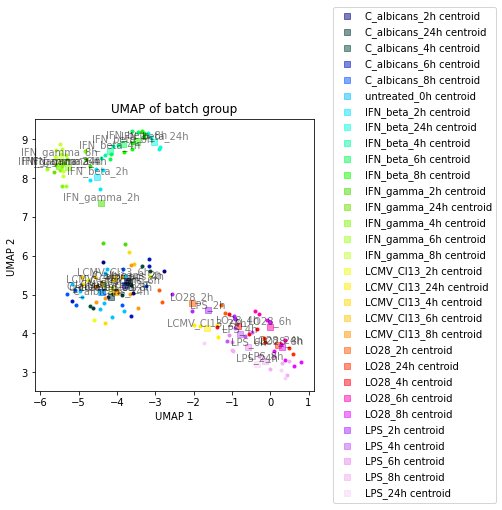

In [13]:
# PCA & UMAP
for step in data_all.keys():
    dimred_UMAP_PCA.dimred_plot(data=data_all[step].T, 
                annot=annot, 
                variables=['treatment','time','library','experiment', 'group'], 
               label=step,
                results_dir=os.path.join(dir_results),
               )